# Evaluation of the Meta-Learn Model for Outlier Detection

We now have computed metafeatures and performance of each of 3 outlier detection algorithms for each dataset in meta_computed.txt. Based on this, we can train three regressors to predict the performance of isolaiton forest, local outlier factor and one class svm on a given dataset.

In [1]:
import matplotlib.pyplot as plt  
import scipy
import numpy as np
import pandas as pd
import openml as oml
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.dpi']= 120
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8 

## Load Computed Table

In [8]:
# read computed table
with open("meta_computed_f1.txt", "rb") as fp: # Unpickling
    datasets = pickle.load(fp)
df = pd.DataFrame(datasets)
cols = ['name', 'contamination(%)', 'metafeatures', 'isolation_forest_f1', 'lof_f1', 'ocsvm_f1']
df = df[cols]
df

,name,contamination(%),metafeatures,isolation_forest_f1,lof_f1,ocsvm_f1
0,lymph,4.10,"[0.26863786259667444, 61.30611403534003, 1.480...",0.996466,0.989399,0.926471
1,glass,4.21,"[0.5600270501084725, 135.14002942901286, 1.068...",0.960976,0.965854,0.935000
2,wdbc,37.26,"[0.6972646145068585, 1300.2082198691544, 0.504...",0.803922,0.711485,0.617318
3,speech,1.65,"[0.012400670667631054, 47.401319205311246, 8.6...",0.984000,0.983724,0.958982
4,satellite_image,31.64,"[0.36628000714210573, 3686.128256862358, 1.120...",0.809275,0.708797,0.409688
5,baseball,9.33,"[0.5309830472185297, 2219.3638242940983, 0.662...",0.955556,0.923457,0.927910
6,ecoli,2.68,"[0.4048955217168707, 235.3615336759734, 0.9762...",0.984709,0.981651,0.959248
7,phoneme,29.35,"[0.2459127488478442, 1646.5528671540126, 1.672...",0.720534,0.733630,0.704097
8,click_prediction_small,16.84,"[0.6419363587593904, 58399.56773256083, 0.6464...",0.835250,0.832962,0.864394
9,musk,15.41,"[0.29743199498855305, 2969.2237503160577, 1.35...",0.834080,0.844293,0.761229


In [17]:
df_meta = pd.DataFrame(df['metafeatures'].values.tolist())
df_meta.columns = ['silhouette', 'calinski_harabaz', 'davies_bouldin', 'naive_bayes', 'naive_bayes_time',
              'linear_discriminant_analysis', 'linear_discriminant_analysis_time', 'one_nearest_neighbor', 'one_nearest_neighbor_time',
              'decision_node', 'decision_node_time', 'random_node', 'random_node_time']
df_meta

,silhouette,calinski_harabaz,davies_bouldin,naive_bayes,naive_bayes_time,linear_discriminant_analysis,linear_discriminant_analysis_time,one_nearest_neighbor,one_nearest_neighbor_time,decision_node,decision_node_time,random_node,random_node_time
0,0.268638,61.306114,1.480671,0.707123,0.062500,0.885714,0.031250,0.757282,0.062500,0.687381,0.062500,0.635794,0.046875
1,0.560027,135.140029,1.068575,0.459829,0.125000,0.604917,0.093750,0.706002,0.062500,0.450565,0.062500,0.431332,0.000000
2,0.697265,1300.208220,0.504404,0.938680,0.062500,0.954381,0.109375,0.915807,0.062500,0.882408,0.062500,0.808493,0.062500
3,0.012401,47.401319,8.690134,0.963101,0.593750,0.976390,0.031250,0.982641,0.031250,0.983452,0.031250,0.983452,0.062500
4,0.366280,3686.128257,1.120920,0.787813,0.203125,0.829672,0.109375,0.882841,0.015625,0.435746,0.031250,0.428268,0.062500
5,0.530983,2219.363824,0.662929,0.838220,0.062500,0.926899,0.078125,0.900115,0.109375,0.906760,0.046875,0.917214,0.062500
6,0.404896,235.361534,0.976231,0.747251,0.046875,0.858553,0.062500,0.808229,0.062500,0.632387,0.062500,0.553860,0.062500
7,0.245913,1646.552867,1.672760,0.760537,0.015625,0.758880,0.031250,0.904514,0.015625,0.753888,0.015625,0.706514,0.015625
8,0.641936,58399.567733,0.646438,0.809903,0.390625,0.831556,0.109375,0.732803,0.062500,0.831581,0.078125,0.831581,0.078125
9,0.297432,2969.223750,1.357711,0.841412,0.406250,0.953630,0.062500,0.720219,0.031250,0.993323,0.031250,0.845863,0.015625


In [18]:
df_score_f1 = df[['isolation_forest_f1','lof_f1','ocsvm_f1']]
df_best_algorithm = df_score_f1.idxmax(axis=1)
df_best_algorithm

0     isolation_forest_f1
1                  lof_f1
2     isolation_forest_f1
3     isolation_forest_f1
4     isolation_forest_f1
5     isolation_forest_f1
6     isolation_forest_f1
7                  lof_f1
8                ocsvm_f1
9                  lof_f1
10    isolation_forest_f1
11    isolation_forest_f1
12    isolation_forest_f1
13    isolation_forest_f1
14    isolation_forest_f1
15                 lof_f1
16               ocsvm_f1
17    isolation_forest_f1
18    isolation_forest_f1
19    isolation_forest_f1
20    isolation_forest_f1
21                 lof_f1
22    isolation_forest_f1
23                 lof_f1
24                 lof_f1
25    isolation_forest_f1
26                 lof_f1
27    isolation_forest_f1
28    isolation_forest_f1
29    isolation_forest_f1
30    isolation_forest_f1
31                 lof_f1
dtype: object

In [19]:
df_best_indicator = df_best_algorithm.replace({'isolation_forest_f1': 0, 'lof_f1': 1, 'ocsvm_f1': 2})
df_best_indicator

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     1
8     2
9     1
10    0
11    0
12    0
13    0
14    0
15    1
16    2
17    0
18    0
19    0
20    0
21    1
22    0
23    1
24    1
25    0
26    1
27    0
28    0
29    0
30    0
31    1
dtype: int64

In [20]:
# metafeatures
X = np.asarray(df['metafeatures'].tolist())
X.shape

(32, 13)

In [21]:
# target: f1 of 3 outlier detection classifiers 
y_isolation_forest = df['isolation_forest_f1'].values
y_lof = df['lof_f1'].values
y_ocsvm = df['ocsvm_f1'].values

# target: best outlier detection classifier
y = df_best_indicator.values
y

array([0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import FormatStrFormatter

def build_forest(X, y):
    forest = Pipeline([('Imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('classifiers', RandomForestClassifier(n_estimators=100, random_state=0))])
    forest.fit(X,y)
    
    importances = forest.steps[1][1].feature_importances_
    indices = np.argsort(importances)[::-1]
    return importances, indices

def plot_feature_importances(features, importances, indices):
    a = 0.8
    f_sub = []
    max_features = 20

    for f in range(min(len(features), max_features)): 
            f_sub.append(f)

    # Create a figure of given size
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    # Set title
    ttl = "meta features"

    df = pd.DataFrame(importances[indices[f_sub]][::-1])
    df.plot(kind='barh', ax=ax, alpha=a, legend=False, edgecolor='w', 
            title=ttl, color = [plt.cm.viridis(np.arange(len(df))*10)])

    # Remove grid lines and plot frame
    ax.grid(False)
    ax.set_frame_on(False)

    # Customize title
    ax.set_title(ax.get_title(), fontsize=14, alpha=a, ha='left', x=0, y=1.0)
    plt.subplots_adjust(top=0.9)

    # Customize x tick lables
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.locator_params(axis='x', tight=True, nbins=5)

    # Customize y tick labels
    yticks = np.array(features)[indices[f_sub]][::-1]
    ax.set_yticklabels(yticks, fontsize=8, alpha=a)
    ax.yaxis.set_tick_params(pad=2) 
    ax.yaxis.set_ticks_position('none') 
    ax.set_ylim(ax.get_ylim()[0]-0.5, ax.get_ylim()[1]+0.5) 

    # Set x axis text
    xlab = 'Feature importance'
    ax.set_xlabel(xlab, fontsize=10, alpha=a)
    ax.xaxis.set_label_coords(0.5, -0.1)

    # Set y axis text
    ylab = 'Feature'
    ax.set_ylabel(ylab, fontsize=10, alpha=a)
    plt.show()

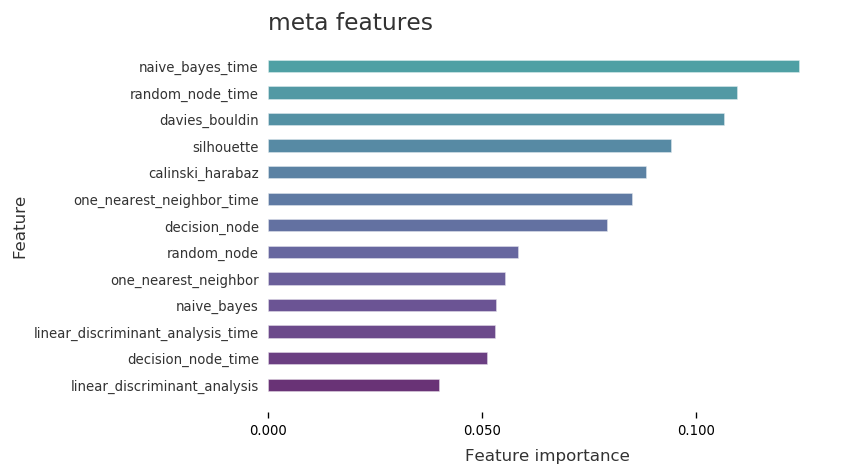

In [31]:
features = ['silhouette', 'calinski_harabaz', 'davies_bouldin', 'naive_bayes', 'naive_bayes_time',
              'linear_discriminant_analysis', 'linear_discriminant_analysis_time', 'one_nearest_neighbor', 'one_nearest_neighbor_time',
              'decision_node', 'decision_node_time', 'random_node', 'random_node_time']
importances, indices = build_forest(np.array(df_meta), y)
plot_feature_importances(features, importances, indices)

## Plot Performance of 3 Outlier Detection Algorithms on Benchmark Datasets

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x = df['name'].tolist(),
    y = y_isolation_forest.tolist(),
    name = 'isolation forest'
)
trace2 = go.Bar(
    x = df['name'].tolist(),
    y = y_lof.tolist(),
    name = 'local outlier factor'
)
trace3 = go.Bar(
    x = df['name'].tolist(),
    y = y_ocsvm.tolist(),
    name = 'one class svm'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

## Evaluate meta learners

The following classifiers are trained and evaluated: <br>
K Nearest Neighbor <br>
SVM <br>
Random Forest


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
# knn meta-learner

# Create dictionary for hyperparamters
param_grid_knn = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1, scoring="accuracy", verbose=1)
grid_search_knn.fit(X, y)

print(grid_search_knn.best_score_)     
print(grid_search_knn.best_params_)
# score_knn_isolation_forest = cross_val_score(knn, X, y_isolation_forest, scoring='r2', cv=5).mean()
# print(score_knn_isolation_forest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.6875
{'n_neighbors': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [43]:
# svm meta-learner
CGgrid = np.logspace(-15,15,num=10,base=2)
param_grid_svm = {'C': CGgrid ,
                  'gamma': CGgrid}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X, y)

print(grid_search_svm.best_score_)     
print(grid_search_svm.best_params_)

0.65625
{'C': 3.0517578125e-05, 'gamma': 3.0517578125e-05}


In [37]:
# random forest meta-learner

# Create dictionary for hyperparamters
param_grid_rf = {'n_estimators': [1,10,20,30,40,50,60,70,80,90,100],
              'max_features': [0.01,0.25,0.50,0.75,1.0]}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X, y)

print(grid_search_rf.best_score_)     
print(grid_search_rf.best_params_)

0.71875
{'max_features': 0.01, 'n_estimators': 30}


## Save best meta-learner

In [44]:
from sklearn.externals import joblib

# save trained meta-learner
joblib.dump(grid_search_rf, 'metalearner_rf.pkl') 

['metalearner_rf.pkl']

## Example of predict the outlier detection algorithm for a random dataset

In [53]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
import time
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

def compute_clustering_metafeatures(X):
    kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)
    labels = kmeans_model.labels_
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    calinski_harabaz_score = metrics.calinski_harabaz_score(X, labels)
    davies_bouldin_score = metrics.davies_bouldin_score(X, labels)
    return silhouette_score, calinski_harabaz_score, davies_bouldin_score
def pipeline(X, y, estimator):
#     if scipy.sparse.issparse(X) == True: # Check if X is sparse array
#         X = X.toarray()
    start_time_pipeline = time.process_time()
    pipe = Pipeline([('Imputer', preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)),
                     ('classifiers', estimator)])
    
    # to prevent sklearn cross_val_score failure due to label imabalance
#     pred = cross_val_predict(pipe, X, y, cv=5)
#     score = roc_auc_score(y, pred)
    score = np.mean(cross_val_score(pipe, X, y, cv=10, scoring='accuracy', n_jobs=-1))
    time_pipeline = time.process_time() - start_time_pipeline
    return score, time_pipeline

def compute_metafeatures(X, y):
    """
    The following landmarking features are computed:
        Naive Bayes Learner;
        Linear Discriminant Learner;
        One Nearest Neighbor Learner;
        Decision Node Learner;
        Randomly Chosen Node Learner
    """
    
    # if regression
    if len(np.unique(y)) > 100 or len(np.unique(y)) > 0.1*y.shape[0]:
        print("regression")
        print("meta features cannot be extracted as the target is not categorical")
    # if classification
    else:
#         print("classification")
        metafeatures_clf = {}
        # compute clustering performance metafeatures
        metafeatures_clf['silhouette'], metafeatures_clf['calinski_harabaz'], metafeatures_clf['davies_bouldin'] = compute_clustering_metafeatures(X)
    
        # compute landmarking metafeatures
        metafeatures_clf['naive_bayes'], metafeatures_clf['naive_bayes_time'] = pipeline(X, y, GaussianNB()) 
        metafeatures_clf['linear_discriminant_analysis'], metafeatures_clf['linear_discriminant_analysis_time'] = pipeline(X, y, LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')) 
        metafeatures_clf['one_nearest_neighbor'], metafeatures_clf['one_nearest_neighbor_time'] = pipeline(X, y, KNeighborsClassifier(n_neighbors = 1)) 
        metafeatures_clf['decision_node'], metafeatures_clf['decision_node_time'] = pipeline(X, y, DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=1, random_state=0)) 
        metafeatures_clf['random_node'], metafeatures_clf['random_node_time'] = pipeline(X, y, DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=1, random_state=0))
        metafeatures = list(metafeatures_clf.values())
    
    return metafeatures

In [67]:
data = oml.datasets.get_dataset(1504)
X, y = data.get_data(target=data.default_target_attribute)

In [73]:
def predict_best_anomaly_algorithm(X, y):
    """
    Predict best anomaly detection algorithm
    0: isolation forest;
    1: lof
    2: one svm
    """
    # extract metafeatures of this dataset
    mf = np.array(compute_metafeatures(X, y))
    mf = mf.reshape(-1, mf.shape[0])
    mf.shape
    
    # load meta learner
    metalearner = joblib.load('metalearner_rf.pkl')
    best_anomaly_algorithm = metalearner.predict(mf)
    return best_anomaly_algorithm

In [75]:
best_anomaly_algorithm = predict_best_anomaly_algorithm(X, y)
best_anomaly_algorithm

array([0], dtype=int64)